##https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

Data Set Information:

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. A few of the images can be found at [Web Link] 

Separating plane described above was obtained using Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree Construction Via Linear Programming." Proceedings of the 4th Midwest Artificial Intelligence and Cognitive Science Society, pp. 97-101, 1992], a classification method which uses linear programming to construct a decision tree. Relevant features were selected using an exhaustive search in the space of 1-4 features and 1-3 separating planes. 

The actual linear program used to obtain the separating plane in the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34]. 

This database is also available through the UW CS ftp server: 
ftp ftp.cs.wisc.edu 
cd math-prog/cpo-dataset/machine-learn/WDBC/

Attribute Information:

1) ID number 

2) Diagnosis (M = malignant, B = benign) 

3-32) 

Ten real-valued features are computed for each cell nucleus: 

a) radius (mean of distances from center to points on the perimeter) 

b) texture (standard deviation of gray-scale values) 

c) perimeter 

d) area 

e) smoothness (local variation in radius lengths) 

f) compactness (perimeter^2 / area - 1.0) 

g) concavity (severity of concave portions of the contour) 

h) concave points (number of concave portions of the contour) 

i) symmetry 

j) fractal dimension ("coastline approximation" - 1)

In [1]:
#importing numpy and pandas
import numpy as np
import pandas as pd


In [2]:
#importing the data set
df = pd.read_csv('G:/data/dataset/breast_cancer/data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [4]:
df.isnull().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

In [5]:
df['Unnamed: 32'].isnull().sum()


569

In [6]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [7]:
#droppping unnamed:32
df.drop('Unnamed: 32',axis=1,inplace = True)

In [8]:
#droppping id
df.drop('id',axis=1,inplace = True)

In [9]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
df.nunique()#number of unique values in each column

diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: int64

In [11]:
df.describe()#statistics

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [12]:
# Reassign target
df.diagnosis.replace(to_replace = dict(M = 1, B = 0), inplace = True)

In [13]:
df.corr()#correlation

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [14]:
m = df[df['diagnosis'] == 1]
b = df[df['diagnosis'] == 0]


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

#count plot
sns.countplot(x='diagnosis', y=None, hue=None, data=df, order=None, hue_order=None, orient='h', 
              color=None, palette=None, saturation=0.75, dodge=True, 
              ax=None,edgecolor=sns.color_palette("dark", 6))

The count of benign tumour count is  larger malignant tumour count

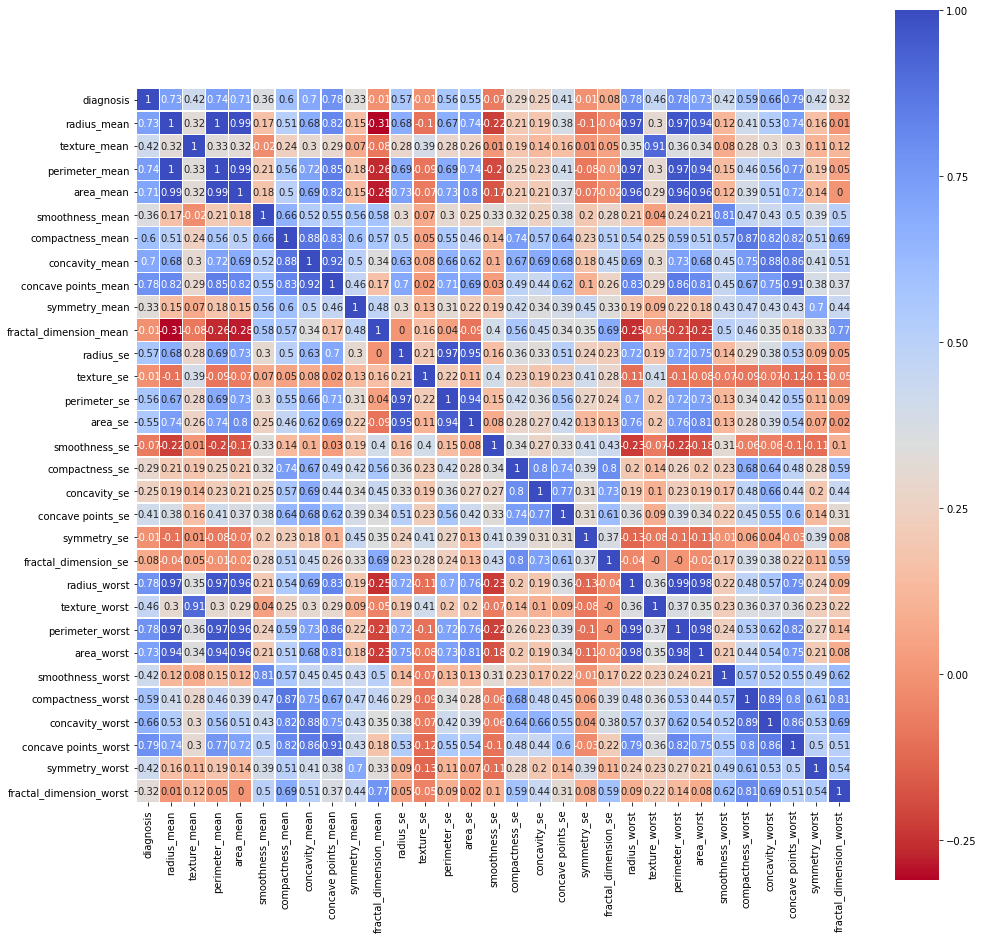

In [16]:
#correlation plot
f,ax =plt.subplots(figsize=(16,16),
                   nrows=1, ncols=1, sharex=False, sharey=False, 
                   squeeze=True, subplot_kw=None, gridspec_kw=None)

cor = df.corr()
sns.heatmap(round((cor),2), vmin=None, vmax=None, cmap='coolwarm_r', center=None,
            robust=False, annot=True, fmt='.2g', annot_kws=None,
            linewidths=0.5, linecolor='white', cbar=True, cbar_kws=None,
            cbar_ax=None,square=True, xticklabels='auto',
            yticklabels='auto', mask=None, ax=ax)

plt.show()

Colormap warmcool is not recognized. Possible values are: Accent,
    Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap,
    CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c,
    tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r

In [17]:
def plot_distribution(df):
    import scipy
    import matplotlib.pyplot as plt
    import seaborn as sns
    p = []
    s = []
    sig = pd.DataFrame()
    sig['variable'] = df.columns[1:]
    for i in range(1,len(df.columns)):
        #T-Test(two sample)
        statistic,pvalue=scipy.stats.ttest_ind(df['diagnosis'],
                                               df[df.columns[i]], 
                                               axis=0, equal_var=True, 
                                               nan_policy='propagate')
        p.append(pvalue)
        if pvalue < 0.05:
            significance='is significant'
            
        else :
            significance='is not significant'
        s.append(significance)
        
        f,ax =plt.subplots(figsize=(12,6),
                   nrows=1, ncols=1, sharex=False, sharey=False, 
                   squeeze=True, subplot_kw=None, gridspec_kw=None)
        
        sns.distplot( df.loc[df['diagnosis']==1,df.columns[i]], bins=None,
                 hist=True, kde=True, rug=False, fit=None, hist_kws=None,
                 kde_kws=None , rug_kws=None, fit_kws=None, color=None , 
                 vertical=False, norm_hist=False, axlabel=None, label='Malignant', ax=None)
        
        sns.distplot( df.loc[df['diagnosis']==0,df.columns[i]], bins=None,
                 hist=True, kde=True, rug=False, fit=None, hist_kws=None,
                 kde_kws=None , rug_kws=None, fit_kws=None, color=None , 
                 vertical=False, norm_hist=False, axlabel=None, label='Benign', ax=None)
        
        plt.title('Distribution of '+df.columns[i]+' '+significance+'( P_value(T_test) :'+str(pvalue)+')',
                  color='white')
        
        plt.legend()
        plt.show()
    
    sig['P_value'] = p
    sig['Significance']=s
    return sig

c:\users\priyasathya\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


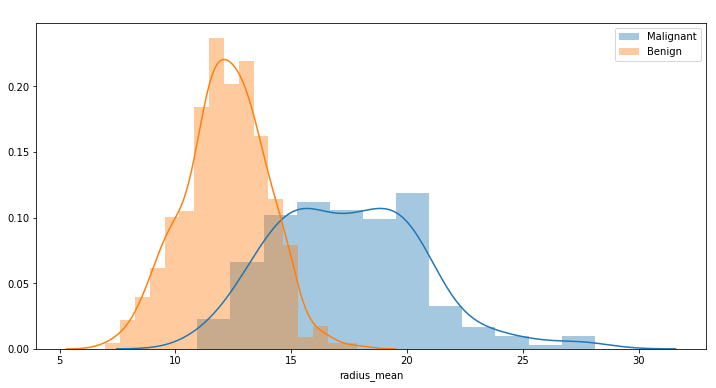

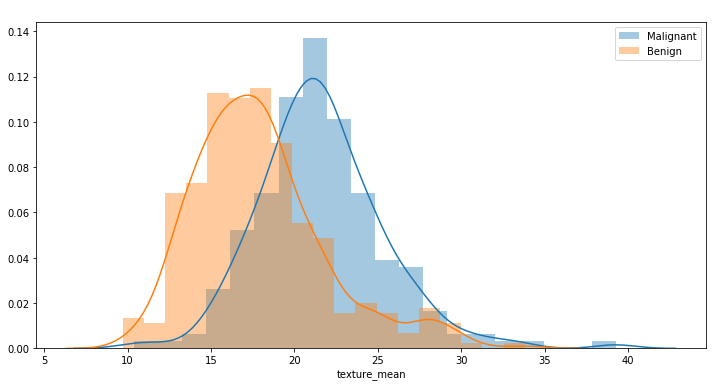

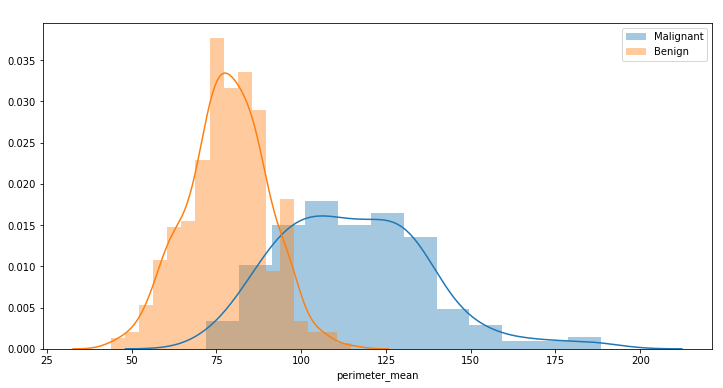

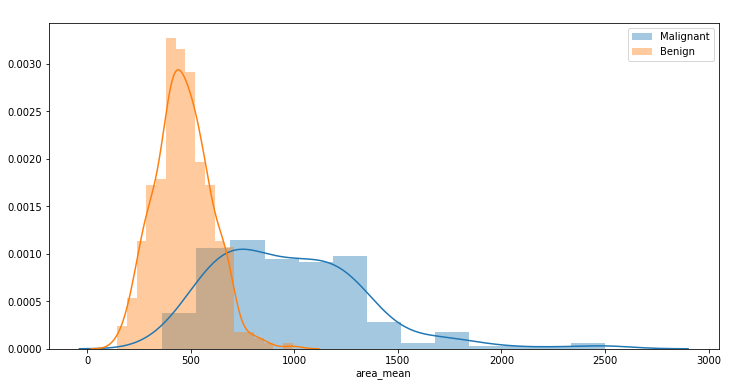

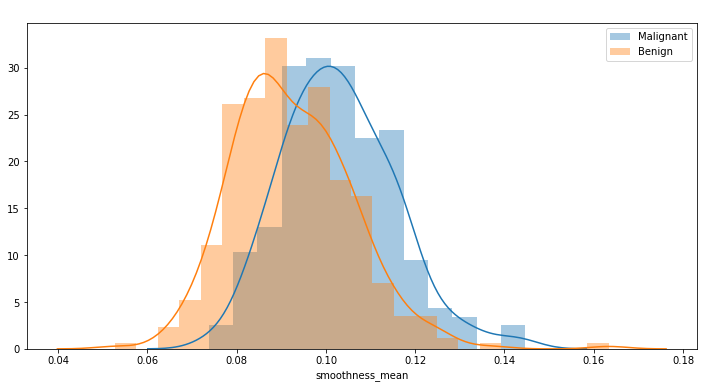

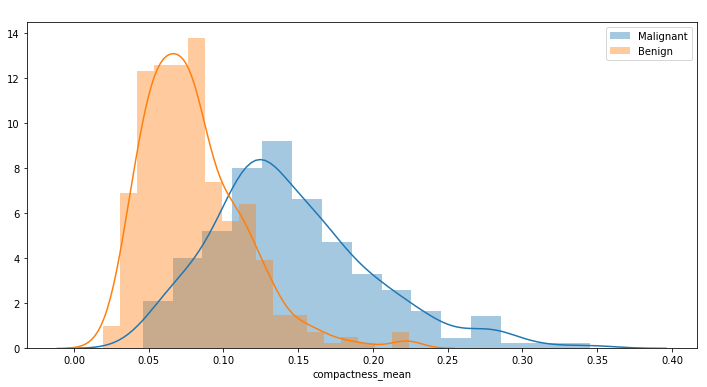

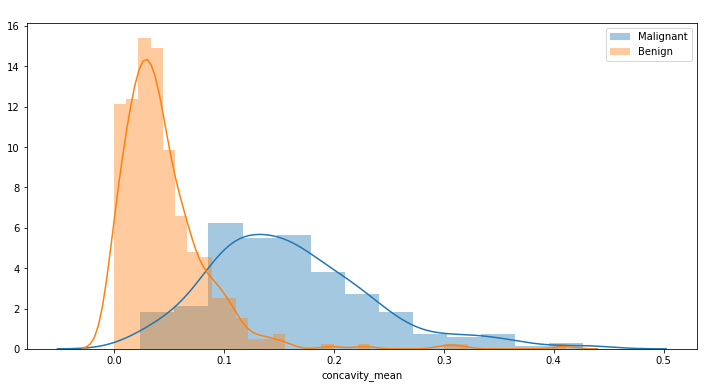

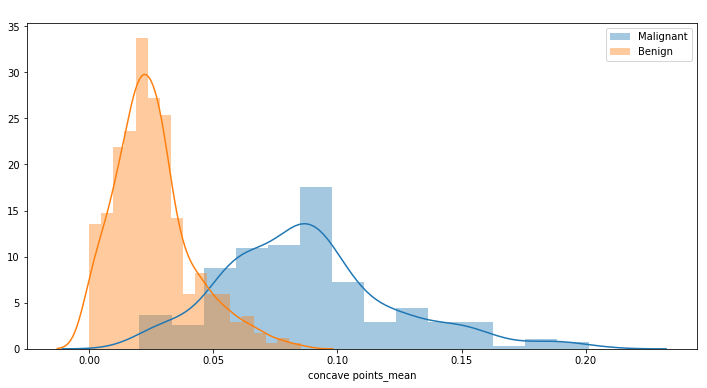

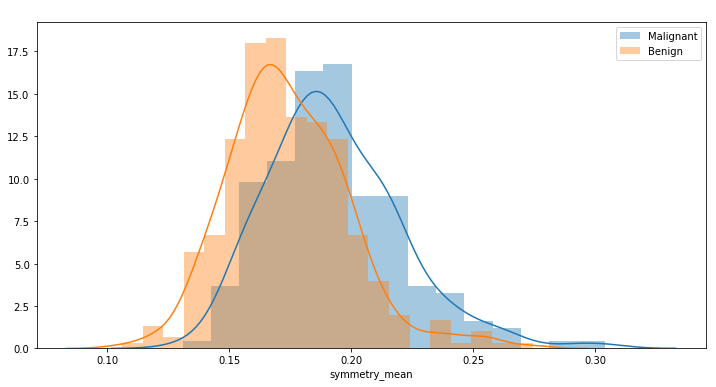

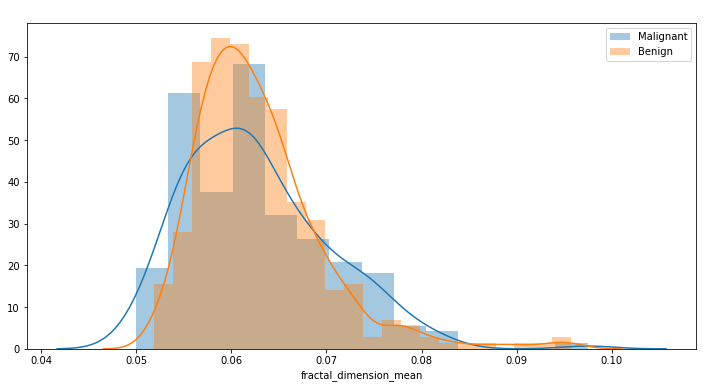

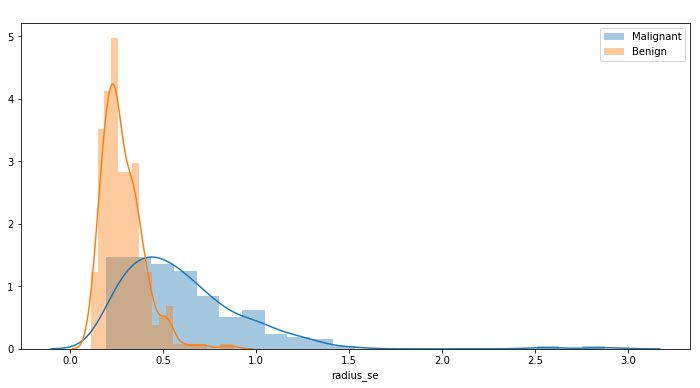

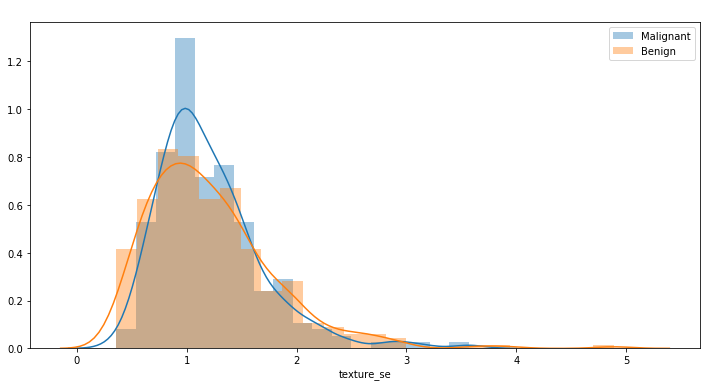

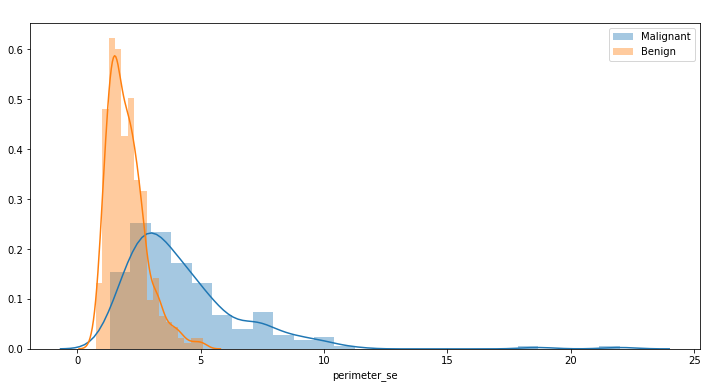

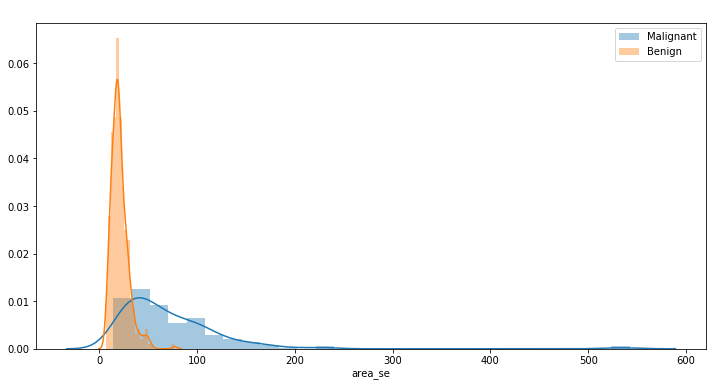

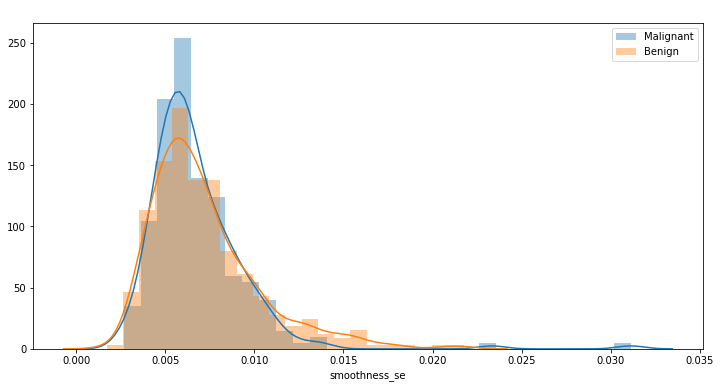

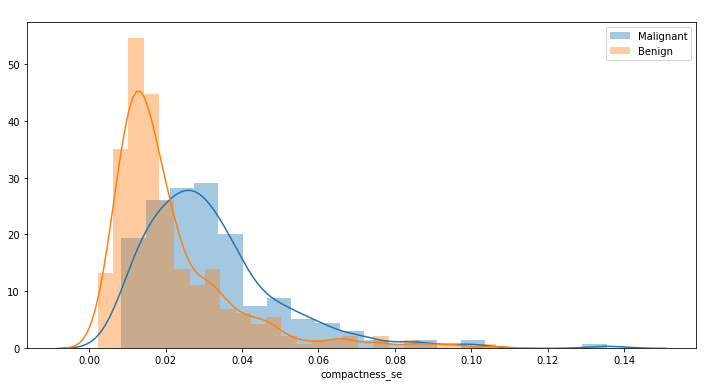

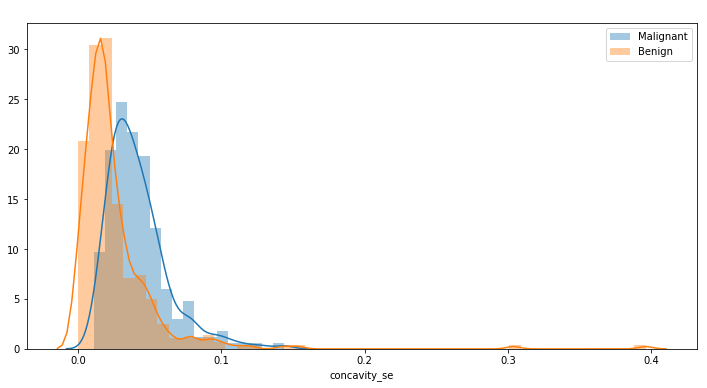

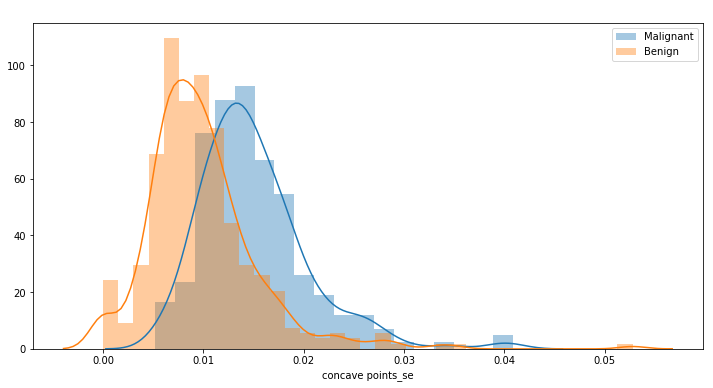

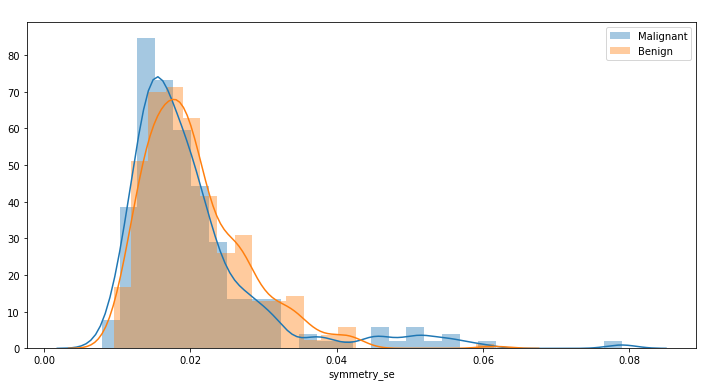

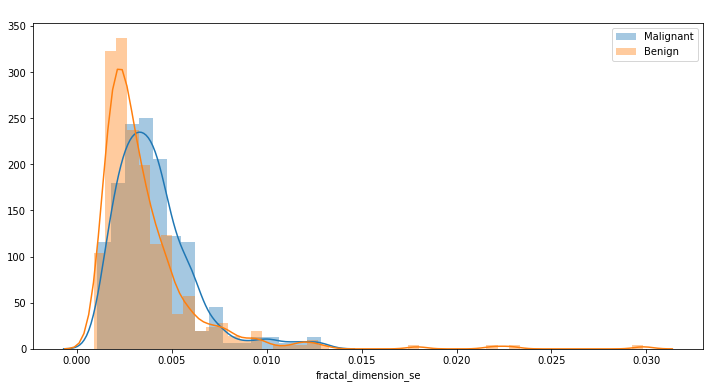

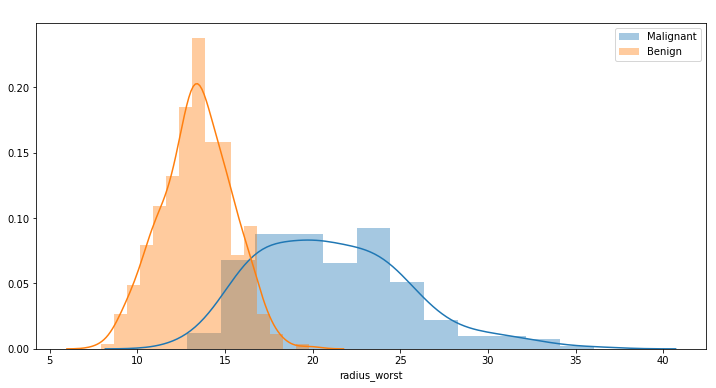

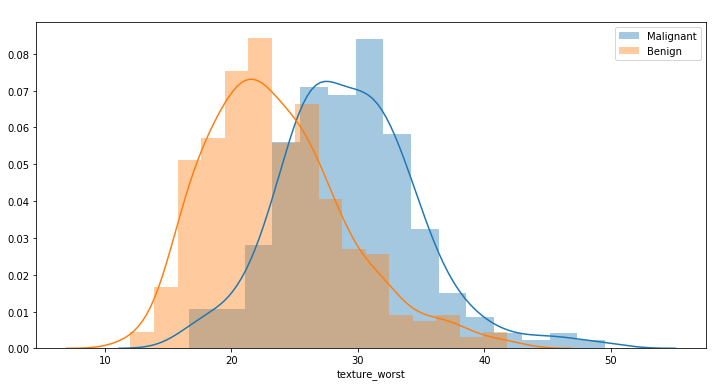

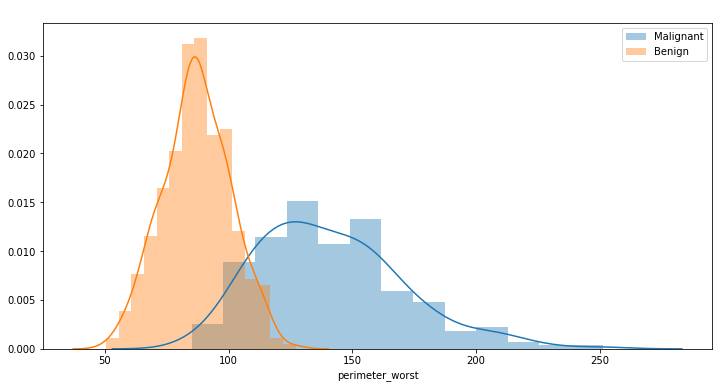

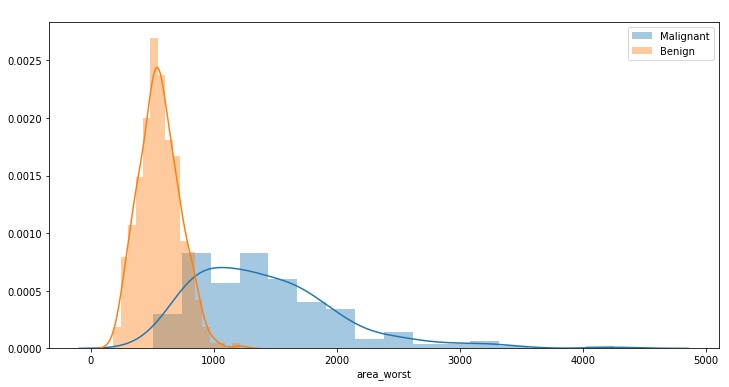

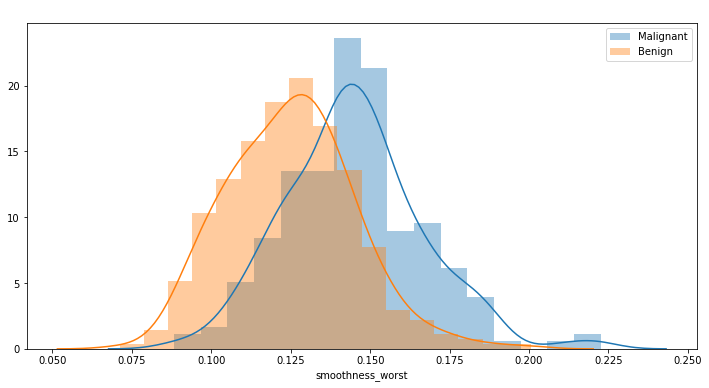

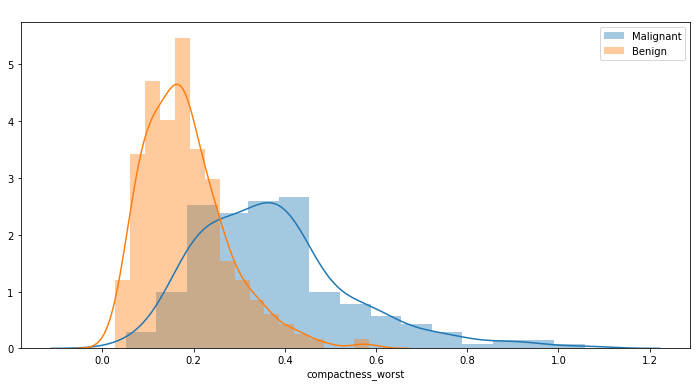

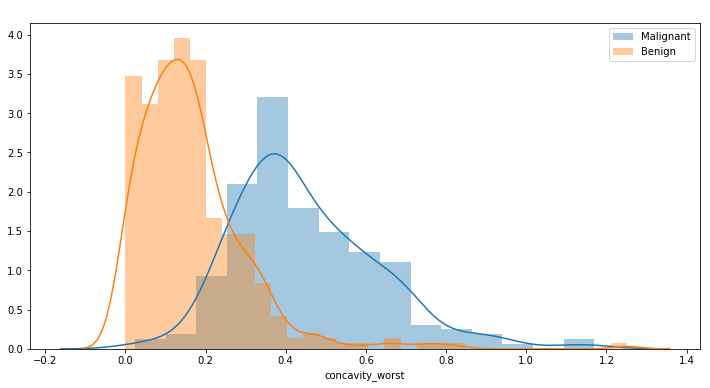

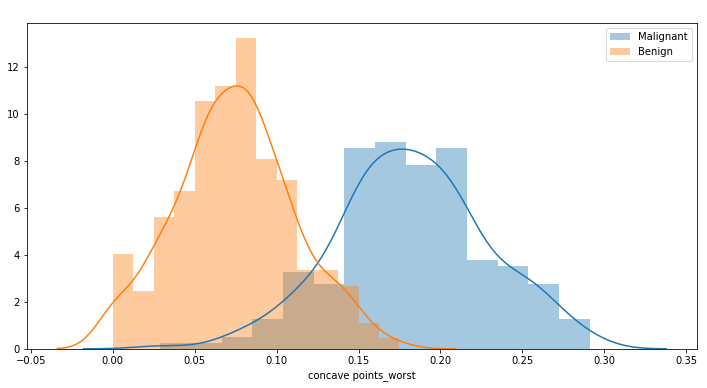

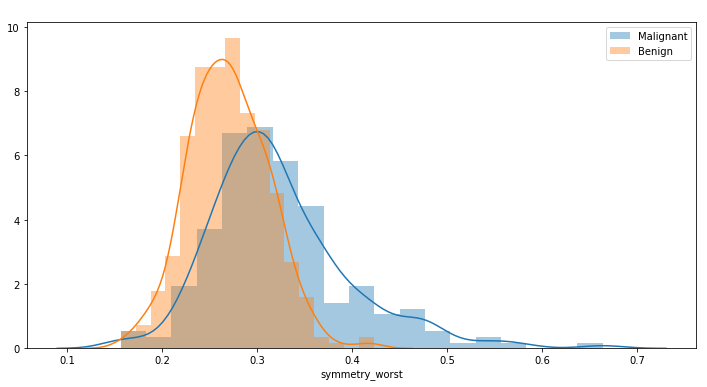

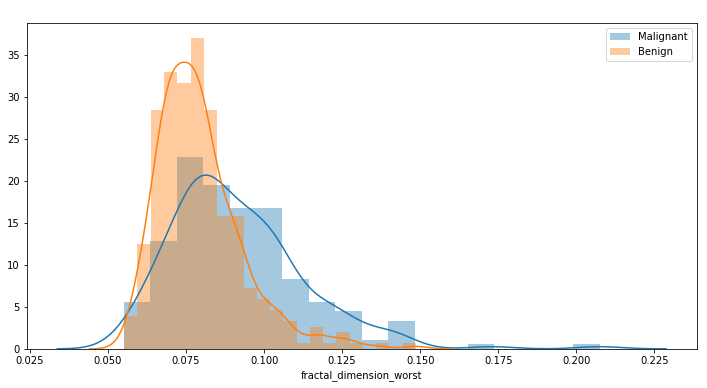

In [18]:
sig=plot_distribution(df)

In [19]:
sig#variable and their significance

,variable,P_value,Significance
0,radius_mean,0.000000e+00,is significant
1,texture_mean,0.000000e+00,is significant
2,perimeter_mean,0.000000e+00,is significant
3,area_mean,3.138523e-250,is significant
4,smoothness_mean,3.441418e-39,is significant
5,compactness_mean,7.706959e-37,is significant
6,concavity_mean,3.538033e-40,is significant
7,concave points_mean,1.436712e-51,is significant
8,symmetry_mean,2.419150e-20,is significant
9,fractal_dimension_mean,5.139403e-48,is significant


In [20]:
#VIF
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df.iloc[:,1:].values, i) for i in range(df.iloc[:,1:].shape[1])]
vif["features"] = df.iloc[:,1:].columns

In [21]:
vif#multicolinearity exists

,VIF Factor,features
0,63306.172036,radius_mean
1,251.047108,texture_mean
2,58123.586079,perimeter_mean
3,1287.262339,area_mean
4,393.398166,smoothness_mean
5,200.980354,compactness_mean
6,157.855046,concavity_mean
7,154.241268,concave points_mean
8,184.426558,symmetry_mean
9,629.679874,fractal_dimension_mean


In [22]:
cor =pd.DataFrame(df.corr())
cor

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [37]:
def high_pos_corr(df):
    var1 = []
    var2 = []
    values=[]
    high_pos_cor=pd.DataFrame()
    corr = pd.DataFrame(df.corr())
    columns=list(cor.columns)
    rows=list(cor.index)
    for column in columns:
        for row in rows:
            if column != row:
                if cor[column][row] > 0.9  :
                    #print(column,row,cor[column][row])
                    var1.append(column)
                    var2.append(row)
                    values.append(cor[column][row])
                
    high_pos_cor['variable1'] = var1
    high_pos_cor['variable2'] = var2
    high_pos_cor['correlation_co.eff'] = values
    return (high_pos_cor.sort_values('correlation_co.eff',ascending = False))
    #print(corr)        
def high_neg_corr(df):
    var1 = []
    var2 = []
    values=[]
    high_neg_cor=pd.DataFrame()
    corr = pd.DataFrame(df.corr())
    columns=list(cor.columns)
    rows=list(cor.index)
    for column in columns:
        for row in rows:
            if column != row:
                if cor[column][row] < -0.7  :
                    #print(column,row,cor[column][row])
                    var1.append(column)
                    var2.append(row)
                    values.append(cor[column][row])
    high_neg_cor['variable1'] = var1
    high_neg_cor['variable2'] = var2
    high_neg_cor['correlation_co.eff'] = values
    return (high_neg_cor.sort_values('correlation_co.eff',ascending = True))
                

In [38]:
high_pos_corr(df).count()

variable1             42
variable2             42
correlation_co.eff    42
dtype: int64

In [39]:
high_neg_corr(df).count()

variable1             0
variable2             0
correlation_co.eff    0
dtype: int64

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#scaling
scale = StandardScaler()
x = df.iloc[:,1:]
x_s=scale.fit_transform(x)

#PCA
pca=PCA(n_components=20, copy=True, whiten=False,svd_solver='auto',
        tol=0.0, iterated_power='auto', random_state=None)
x_p = pd.DataFrame(pca.fit_transform(x_s))

In [41]:
print('explained_variance_:',pca.explained_variance_)
print('\n')
print('explained_variance_ratio:',pca.explained_variance_ratio_)
print('\n')
print('singular_values_:',pca.singular_values_)
print('\n')
print('mean_:',pca.mean_)

explained_variance_: [13.30499079  5.7013746   2.82291016  1.98412752  1.65163324  1.20948224
  0.67640888  0.47745625  0.41762878  0.35131087  0.29443315  0.26162116
  0.24178242  0.15728615  0.0943007   0.0800034   0.05950361  0.05271142
  0.0495647   0.03121426]


explained_variance_ratio: [0.44272026 0.18971182 0.09393163 0.06602135 0.05495768 0.04024522
 0.02250734 0.01588724 0.01389649 0.01168978 0.00979719 0.00870538
 0.00804525 0.00523366 0.00313783 0.00266209 0.00197997 0.00175396
 0.00164925 0.00103865]


singular_values_: [86.93235745 56.90677266 40.04263937 33.57058877 30.62887007 26.2104161
 19.60102663 16.46800391 15.4017255  14.12602481 12.93205441 12.19019359
 11.71889139  9.4519063   7.31866075  6.74106325  5.81360925  5.47175363
  5.30591648  4.21066503]


mean_: [-1.37363271e-16  6.86816353e-17 -1.24875700e-16 -2.18532476e-16
  1.74825981e-16  1.99801121e-16  3.74627101e-17 -3.74627101e-17
  1.87313551e-16  4.52674414e-16  2.49751401e-16 -1.03022453e-16
 -3.49651961e

In [42]:
exp_var = pca.explained_variance_ratio_

In [43]:
exp_var[0:10].sum()#95%

0.9515688143366666

In [44]:
X = x_p.iloc[:,:10] 
X.head()
y=df['diagnosis']

In [75]:
r_s = 101
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=r_s,
                                                 test_size=0.2,stratify=None,
                                                 shuffle=False)

In [46]:
#Evaluation metrics
from sklearn.model_selection import cross_val_score
#from sklearn.metrics import precision_score,recall_score,confusion_matrix,roc_curve,accuracy_score

from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve
from sklearn.metrics import precision_score, recall_score, confusion_matrix, roc_curve,roc_auc_score
from sklearn.metrics import  precision_recall_curve, accuracy_score
from sklearn.metrics import auc

In [47]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, 
                         fit_intercept=True, intercept_scaling=1, 
                         class_weight=None, random_state=r_s,
                         solver='liblinear', max_iter=100, multi_class='ovr',
                         verbose=0, warm_start=False, n_jobs=1)
log.fit(x_train,y_train)
y_pred = log.predict(x_test)
y_proba = log.predict_proba(x_test)

In [48]:
prediction = pd.DataFrame()
prediction['Actual'] = y_test
prediction['y_pred_1'] = y_pred
#prediction['Probability'] = y_proba
prediction

,Actual,y_pred_1
455,0,1
456,0,1
457,0,0
458,0,0
459,0,0
460,1,1
461,1,1
462,0,0
463,0,0
464,0,0


In [49]:
cm=confusion_matrix(y_test,y_pred)

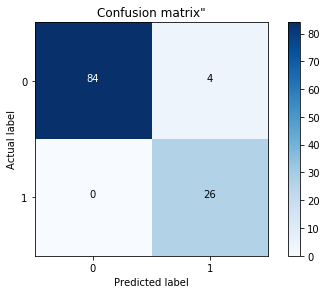

In [51]:
# Confusion matrix 
import itertools
def plot_confusion_matrix(cm, classes=[0,1],
                          normalize = False,
                          title = 'Confusion matrix"',
                          cmap = 'Blues') :
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])) :
        plt.text(j, i, cm[i, j],
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
plot_confusion_matrix(cm)

In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       1.00      0.95      0.98        88
          1       0.87      1.00      0.93        26

avg / total       0.97      0.96      0.97       114



In [53]:

def evaluation_own(y_test,y_pred):
    cm=confusion_matrix(y_test,y_pred)
    tp = cm[1][1]
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    recall = tp/(tp+fn)
    specificity = tn/(tn+fp)
    precision = tp/(tp+fp)
    f_measure = 2*(precision)*(recall)/(precision+recall)
    print('True_Positive:',tp)
    print('True_Negative:',tn)
    print('False_Positive:',fp)
    print('False_Negative:',fn)
    print('Accuracy :',accuracy)
    #print('ROC_AUC_score :',roc_auc_score(y_test,y_pred))
    print('Precision :',precision)
    print('Recall/Sensitivity :',recall)
    print('F-Measure :',f_measure)


In [54]:
#training accuracy
train_pred = log.predict(x_train)
evaluation_own(y_train,train_pred)

True_Positive: 180
True_Negative: 266
False_Positive: 3
False_Negative: 6
Accuracy : 0.9802197802197802
Precision : 0.9836065573770492
Recall/Sensitivity : 0.967741935483871
F-Measure : 0.975609756097561


In [55]:
#test accuracy
y_pred = log.predict(x_test)
evaluation_own(y_test,y_pred)

True_Positive: 26
True_Negative: 84
False_Positive: 4
False_Negative: 0
Accuracy : 0.9649122807017544
Precision : 0.8666666666666667
Recall/Sensitivity : 1.0
F-Measure : 0.9285714285714286


In [56]:
#metrics
def evaluation_sklearn(y_test,y_pred):
    cm=confusion_matrix(y_test,y_pred)
    
    print('True_Positive:',cm[1][1])
    print('True_Negative:',cm[0][0])
    print('False_Positive:',cm[0][1])
    print('False_Negative:',cm[1][0])
    print('Accuracy :',accuracy_score(y_test,y_pred))
    print('ROC_AUC_score :',roc_auc_score(y_test,y_pred))
    print('Precision :',precision_score(y_test,y_pred))
    print('Recall :',recall_score(y_test,y_pred))
evaluation_sklearn(y_test,y_pred)

True_Positive: 26
True_Negative: 84
False_Positive: 4
False_Negative: 0
Accuracy : 0.9649122807017544
ROC_AUC_score : 0.9772727272727273
Precision : 0.8666666666666667
Recall : 1.0


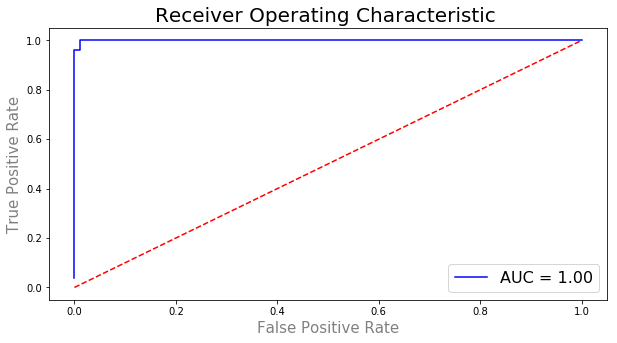

In [57]:
#roc_curve(y_test,y_pred,pos_label=None, sample_weight=None, drop_intermediate=True)
def ROC_AUC(x_test,y_test,log):
    roc, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,5))
    probs = log.predict_proba(x_test)
    y_prob = probs[:,1]
    fpr, tpr, threshold = roc_curve(y_test, y_prob)

    from sklearn import metrics
    roc_auc= auc(fpr, tpr)

    ax.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    ax.plot([0, 1], [0, 1],'r--')
    ax.set_title('Receiver Operating Characteristic ',fontsize=20)
    ax.set_ylabel('True Positive Rate',fontsize=15,color ='grey')
    ax.set_xlabel('False Positive Rate',fontsize=15,color ='grey')
    ax.legend(loc = 'lower right', prop={'size': 16})

    plt.subplots_adjust(wspace=1)
ROC_AUC(x_test,y_test,log)

In [58]:
cm.ravel()

array([84,  4,  0, 26], dtype=int64)

In [59]:
#Grid search
param_grid = {
            'penalty' : ['l2','l1'],  
            'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]
            }
log_hyp_cv = GridSearchCV(estimator = log, param_grid = param_grid ,
                          scoring = 'accuracy', verbose = 1,
                          n_jobs = -1)
log_hyp_cv.fit(x_train, y_train)

best_parameters = log_hyp_cv.best_params_
print('The best parameters for using this model is', best_parameters)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:   49.2s finished


The best parameters for using this model is {'C': 0.1, 'penalty': 'l2'}


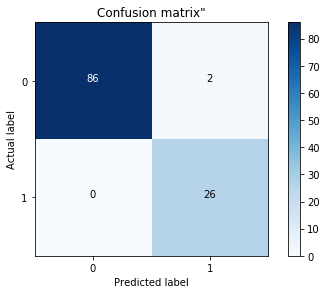

In [60]:

log1=LogisticRegression(penalty=best_parameters['penalty'],
                        dual=False, tol=0.0001, C=best_parameters['C'], 
                        fit_intercept=True, intercept_scaling=1, 
                        class_weight=None, random_state=r_s,
                        solver='liblinear', max_iter=100, multi_class='ovr',
                        verbose=0, warm_start=False, n_jobs=1)

log1.fit(x_train,y_train)
y_pred = log1.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm)

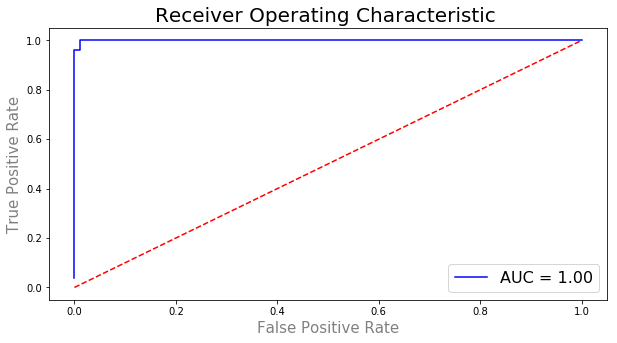

In [61]:
#roc_curve(y_test,y_pred,pos_label=None, sample_weight=None, drop_intermediate=True)
def ROC_AUC_curve(x_test,y_test,log):
    roc, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,5))
    probs = log.predict_proba(x_test)
    y_prob = probs[:,1]
    fpr, tpr, threshold = roc_curve(y_test, y_prob)

    from sklearn import metrics
    roc_auc= auc(fpr, tpr)

    ax.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    ax.plot([0, 1], [0, 1],'r--')
    ax.set_title('Receiver Operating Characteristic ',fontsize=20)
    ax.set_ylabel('True Positive Rate',fontsize=15,color ='grey')
    ax.set_xlabel('False Positive Rate',fontsize=15,color ='grey')
    ax.legend(loc = 'lower right', prop={'size': 16})

    plt.subplots_adjust(wspace=1)
ROC_AUC(x_test,y_test,log)

Threshold and Precision : 0.1 1.0

Threshold and Precision : 0.2 1.0

Threshold and Precision : 0.3 1.0

Threshold and Precision : 0.4 1.0

Threshold and Precision : 0.5 1.0

Threshold and Precision : 0.6 0.9615384615384616

Threshold and Precision : 0.7 0.9230769230769231

Threshold and Precision : 0.8 0.8846153846153846

Threshold and Precision : 0.9 0.8846153846153846



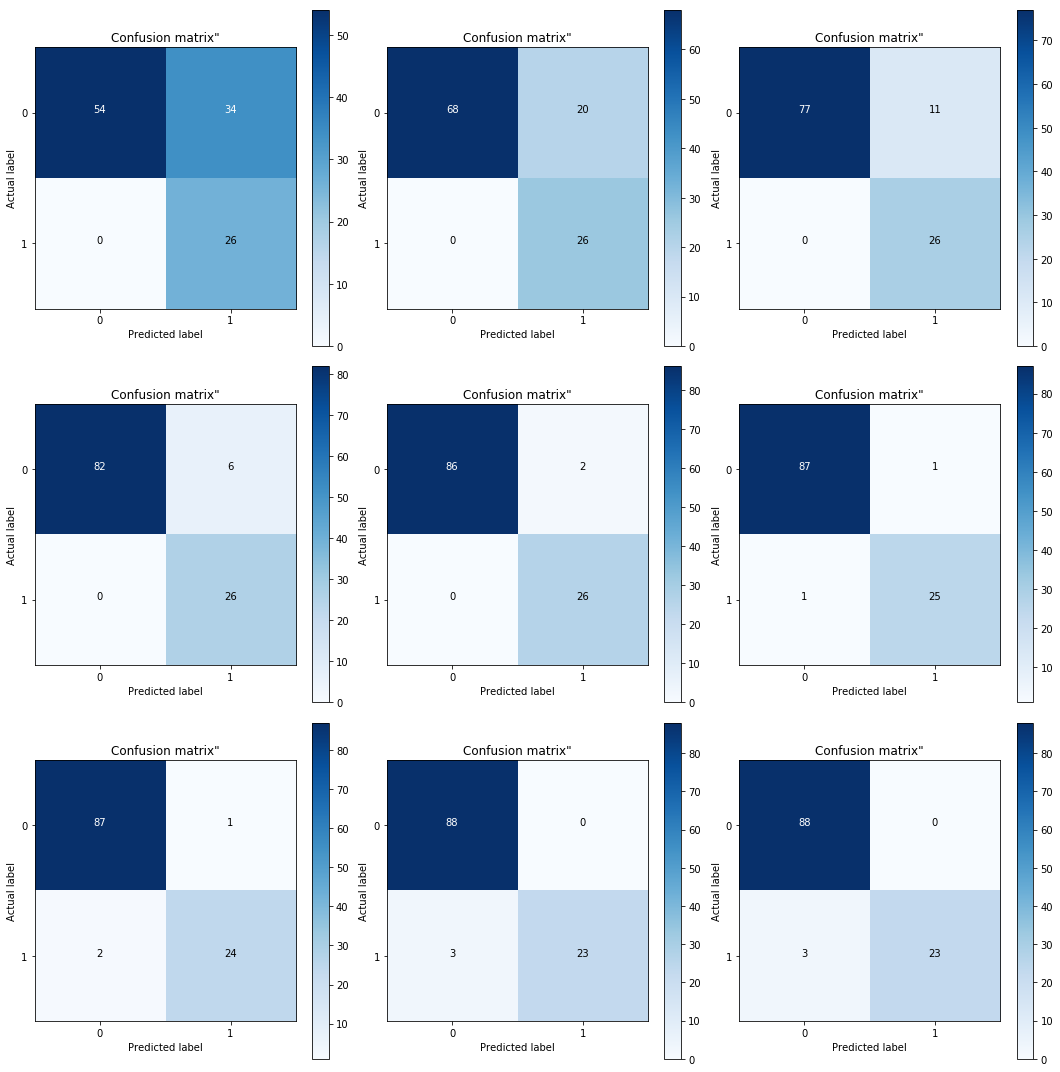

In [62]:
threshold = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
#prob=log1.predict_proba(x_test)
plt.figure(figsize=(15,15))
j=1
for i in threshold:
    y_pred=log1.predict_proba(x_test)[:,1] > i
    plt.subplot(3,3,j)
    j += 1
    cm=confusion_matrix(y_test,y_pred)
    print('Threshold and Precision :',i,recall_score(y_test,y_pred))
    print()
    plot_confusion_matrix(cm)
    

True_Positive: 26
True_Negative: 86
False_Positive: 2
False_Negative: 0
Accuracy : 0.9824561403508771
ROC_AUC_score : 0.9886363636363636
Precision : 0.9285714285714286
Recall : 1.0


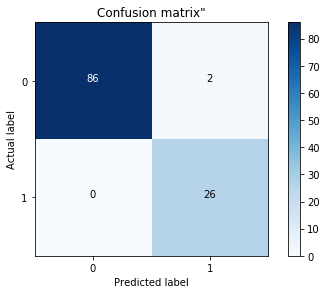

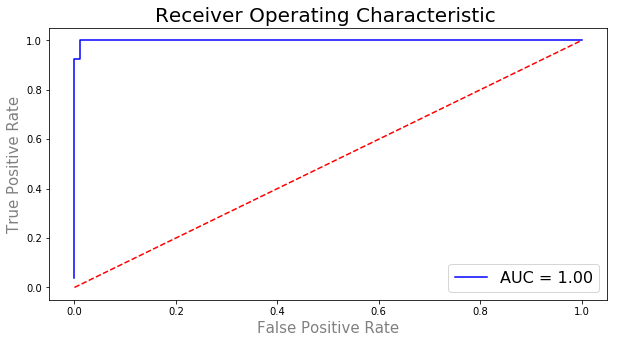

In [63]:
y_pred=log1.predict_proba(x_test)[:,1] > 0.5
cm=confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm)
ROC_AUC(x_test,y_test,log1)
evaluation_sklearn(y_test,y_pred)

In [64]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [65]:
x_all=df.drop('diagnosis',axis=1)
x_all.head()
x_a_train,x_a_test,y_train,y_test = train_test_split(x_s,y,test_size = 0.2,random_state = r_s)

In [66]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import VotingClassifier


True_Positive: 40
True_Negative: 72
False_Positive: 0
False_Negative: 2
Accuracy : 0.9824561403508771
ROC_AUC_score : 0.9761904761904762
Precision : 1.0
Recall : 0.9523809523809523


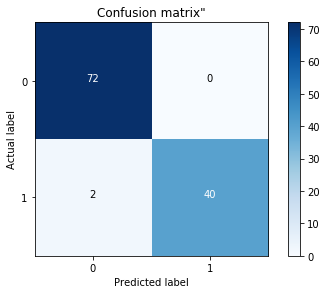

In [67]:
log_r = LogisticRegression( 
                           random_state = r_s)

selector = RFE(log_r)
selector = selector.fit(x_a_train, y_train)
y_pred = selector.predict(x_a_test)
#y_score = selector.predict_proba(x_a_test)[:,1]
cm=confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm)
evaluation_sklearn(y_test,y_pred)

In [68]:
print(selector.support_)
print(selector.ranking_)

[False False False False False False  True  True False  True  True False
 False  True False  True False False False  True  True  True  True  True
  True False  True  True False  True]
[ 7  6  8  4 16  5  1  1 15  1  1 11  2  1 12  1  9 10 14  1  1  1  1  1
  1 13  1  1  3  1]


Threshold and Precision : 0.1 1.0

Threshold and Precision : 0.2 0.9761904761904762

Threshold and Precision : 0.3 0.9523809523809523

Threshold and Precision : 0.4 0.9523809523809523

Threshold and Precision : 0.5 0.9523809523809523

Threshold and Precision : 0.6 0.9523809523809523

Threshold and Precision : 0.7 0.9285714285714286

Threshold and Precision : 0.8 0.9047619047619048

Threshold and Precision : 0.9 0.8571428571428571



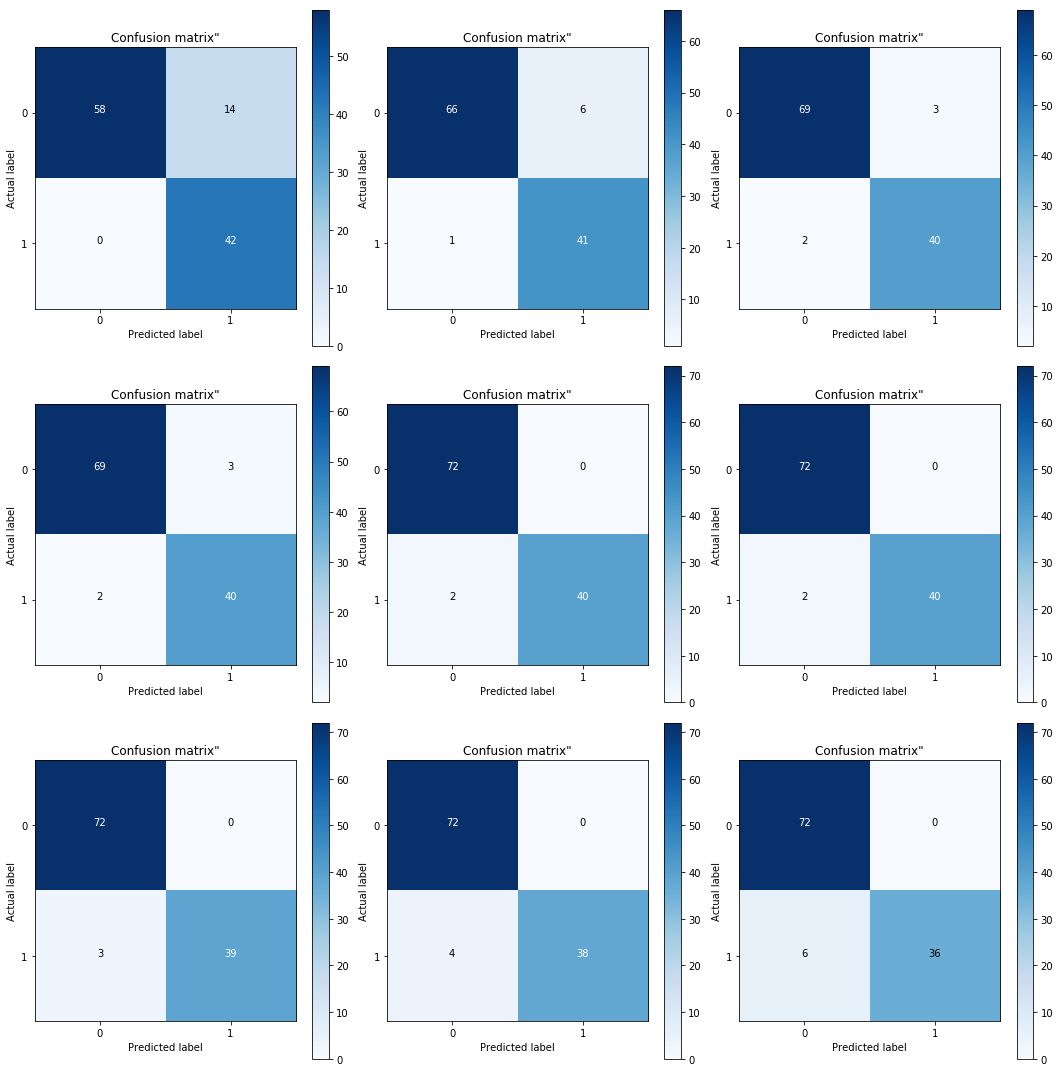

In [69]:
threshold = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
#prob=log1.predict_proba(x_test)
plt.figure(figsize=(15,15))
j=1
for i in threshold:
    y_pred=selector.predict_proba(x_a_test)[:,1] > i
    plt.subplot(3,3,j)
    j += 1
    cm=confusion_matrix(y_test,y_pred)
    print('Threshold and Precision :',i,recall_score(y_test,y_pred))
    print()
    plot_confusion_matrix(cm)
    

In [80]:
r_s = 101
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=r_s,
                                                 test_size=0.2,stratify=None,
                                                 shuffle=False)


#Final model
log_final = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=0.1, fit_intercept=True,
                               intercept_scaling=1, class_weight=None, random_state=None, solver='liblinear',
                               max_iter=100, multi_class='ovr', verbose=0, warm_start=False, n_jobs=1)
log_final.fit(x_train,y_train)
y_pred = log_final.predict(x_test)
cm = confusion_matrix(y_test,y_pred)

True_Positive: 26
True_Negative: 86
False_Positive: 2
False_Negative: 0
Accuracy : 0.9824561403508771
ROC_AUC_score : 0.9886363636363636
Precision : 0.9285714285714286
Recall : 1.0


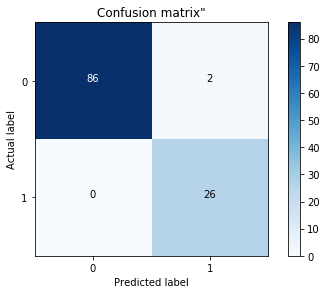

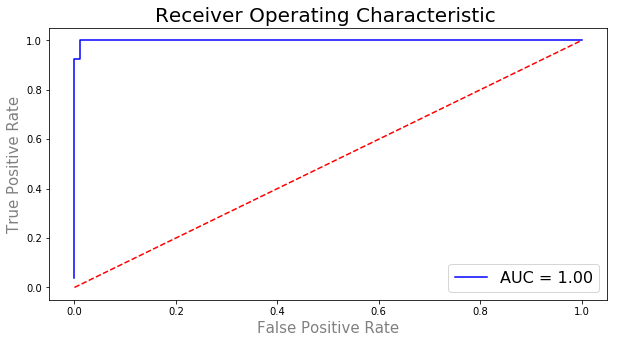

In [81]:
plot_confusion_matrix(cm)
ROC_AUC(x_test,y_test,log_final)
evaluation_sklearn(y_test,y_pred)